<a href="https://colab.research.google.com/github/ibrayoubi10/TER-ALLERGIE/blob/main/Classification_Allergie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# librairies générales
import pandas as pd
import re
from tabulate import tabulate
import time
import numpy as np
import pickle
import string
import base64
import sys
# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
# librairies scikit learn
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# librairies des classifiers utilisés
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
# librairies NLTK
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/TER'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive
%pwd

/content/gdrive/My Drive/Colab Notebooks/TER


'/content/gdrive/My Drive/Colab Notebooks/TER'

In [4]:
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks/TER")
from MyNLPUtilities import *

In [5]:
import pandas as pd

# Read the Excel file
df = pd.read_excel("V1_data_filtered.xlsx", engine="openpyxl")

# Display the first few rows
print(df.head())

  Patient_ID Chip_Code  Allergy_Present  Act_d_1  Act_d_2  Act_d_5  Act_d_8  \
0    XPW0001   XPW0001                1      0.0     0.44      0.0      0.0   
1    XPW0002   XPW0002                1      0.0     0.00      0.0      0.0   
2    XPW0003   XPW0003                1      0.0     0.80      0.0      0.0   
3    XPW0004   XPW0004                1      0.0     0.00      0.0      0.0   
4    XPW0005   XPW0005                1      0.0     0.00      0.0      0.0   

   Aln_g_1  Alt_a_1  Alt_a_6  ...  Pla_l_1  Pol_d_5  Pru_p_1  Pru_p_3  \
0      0.0     8.42      0.0  ...      0.0      0.0      0.0      0.0   
1      0.0     0.00      0.0  ...      0.0      0.0      0.0      0.0   
2      0.0     0.38      0.0  ...      0.0      0.0      0.0      0.0   
3      0.0     0.00      0.0  ...      0.0      0.0      0.0      0.0   
4      0.0     0.00      0.0  ...      0.0      0.0      0.0      0.0   

   Sal_k_1  Ses_i_1  Tri_a_14  Tri_a_19.0101  Tri_a_aA_TI  Ves_v_5  
0      0.0      0

Preparation de données

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Supposons que df contient déjà les données
X = df.drop(["Patient_ID", "Chip_Code", "Allergy_Present"], axis=1)  # Features
y = df["Allergy_Present"]  # Cible (0 = Pas d'allergie, 1 = Allergie)

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

RANDOMFOREST

In [7]:
# Diviser en jeu d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialiser et entraîner un modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f"Précision du modèle : {accuracy:.2f}")
print("\nMatrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", class_report)

Précision du modèle : 0.57

Matrice de confusion :
 [[108 117]
 [ 86 160]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.56      0.48      0.52       225
           1       0.58      0.65      0.61       246

    accuracy                           0.57       471
   macro avg       0.57      0.57      0.56       471
weighted avg       0.57      0.57      0.57       471



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 SVM 🔹
Précision : 0.54
Matrice de confusion :
 [[ 37 188]
 [ 28 218]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.57      0.16      0.26       225
           1       0.54      0.89      0.67       246

    accuracy                           0.54       471
   macro avg       0.55      0.53      0.46       471
weighted avg       0.55      0.54      0.47       471


🔹 KNN 🔹
Précision : 0.50
Matrice de confusion :
 [[119 106]
 [129 117]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.48      0.53      0.50       225
           1       0.52      0.48      0.50       246

    accuracy                           0.50       471
   macro avg       0.50      0.50      0.50       471
weighted avg       0.50      0.50      0.50       471


🔹 XGBoost 🔹
Précision : 0.58
Matrice de confusion :
 [[105 120]
 [ 78 168]]
Rapport de classification :
               precision    recall  f

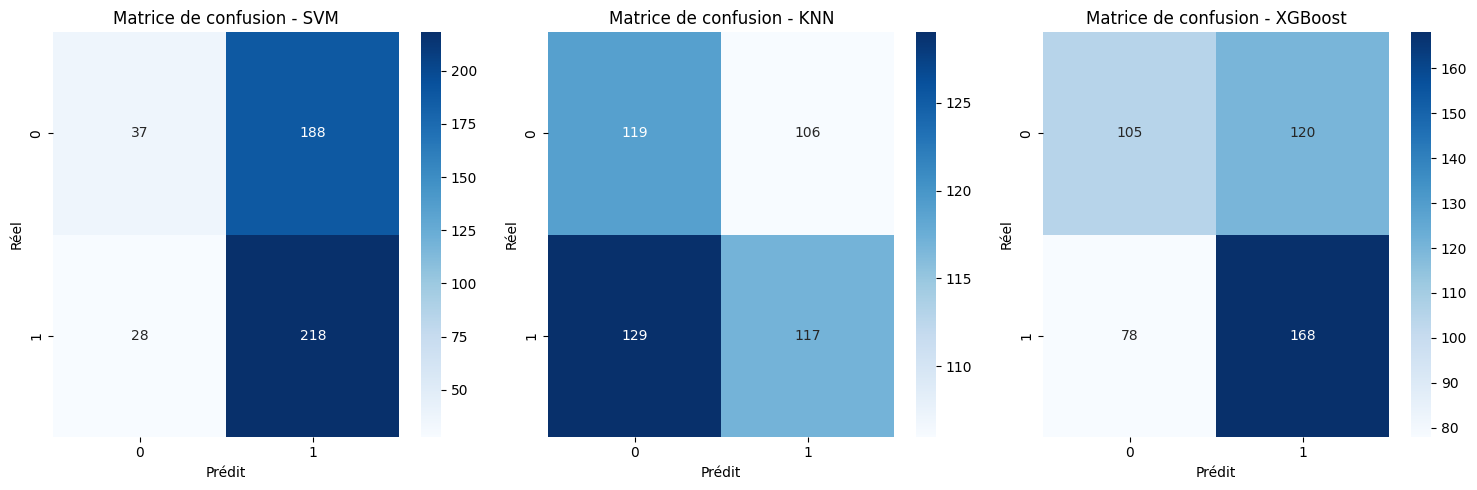

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Préparation des données
X = df.drop(["Patient_ID", "Chip_Code", "Allergy_Present"], axis=1)  # Features
y = df["Allergy_Present"]  # Cible (0 = Pas d'allergie, 1 = Allergie)

# Standardisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 📌 1️⃣ Modèle SVM
svm_model = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 📌 2️⃣ Modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# 📌 3️⃣ Modèle XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# 📌 Évaluation des modèles
models = {"SVM": y_pred_svm, "KNN": y_pred_knn, "XGBoost": y_pred_xgb}
for model_name, y_pred in models.items():
    print(f"\n🔹 {model_name} 🔹")
    print(f"Précision : {accuracy_score(y_test, y_pred):.2f}")
    print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
    print("Rapport de classification :\n", classification_report(y_test, y_pred))

# 📌 Visualisation des matrices de confusion
plt.figure(figsize=(15, 5))
for i, (model_name, y_pred) in enumerate(models.items()):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matrice de confusion - {model_name}")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")

plt.tight_layout()
plt.show()
